# Part II - Communicate Data Findings: Prosper Loan Dataset
## by Adeyemo Oluwatosin M.

## Investigation Overview


> In this investigation, I want to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, loan term, borrower's stated monthly income and monthly payment.

## Dataset Overview

> The dataset contains 96896 rows and 12 variables which was extracted from Prosper loan data that originally comprises of 113,937 loans and 81 variables. The attributes included are EmploymentStatus, LoanOriginalAmount, TotalTrades, Occupation, IsBorrowerHomeowner, TotalInquiries, BorrowerAPR, StatedMonthlyIncome, Term, IncomeRange, DebtToIncomeRatio and MonthlyLoanPayment.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('loan_df.csv')
loan_df.head()

,EmploymentStatus,LoanOriginalAmount,TotalTrades,Occupation,IsBorrowerHomeowner,TotalInquiries,BorrowerAPR,StatedMonthlyIncome,Term,IncomeRange,DebtToIncomeRatio,MonthlyLoanPayment
0,Self-employed,9425,11.0,Other,True,3.0,0.16516,3083.333333,36,"$25,000-49,999",0.17,330.43
1,Employed,10000,29.0,Professional,False,5.0,0.12016,6125.000000,36,"$50,000-74,999",0.18,318.93
2,Not available,3001,NaN,Other,False,1.0,0.28269,2083.333333,36,Not displayed,0.06,123.32
3,Employed,10000,26.0,Skilled Labor,True,1.0,0.12528,2875.000000,36,"$25,000-49,999",0.15,321.45
4,Employed,15000,39.0,Executive,True,9.0,0.24614,9583.333333,36,"$100,000+",0.26,563.97


In [3]:
#funtion to plot a labeled histogram

def histogram(feature, Bins):
    '''
    The histogram function has two  parameters:
    feature: the variable of interest to plot
    Bins: set the bins of the histogram
    '''
    loan_df[feature].hist(figsize = (8, 8), color = 'green', bins = Bins)
    plt.axvline(x = loan_df[feature].mean(), color = 'red')
    name = str()
    plt.title('Distribution of {}'.format(loan_df[[feature]].columns[0]))
    plt.xlabel(loan_df[[feature]].columns[0])
    plt.ylabel('Frequency')

## Distribution of Borrower APR

> The distribution of APR is unimodal at about 0.36 which means that majority of borrowers receive an APR of about 0.36. The average APR is about 0.22 

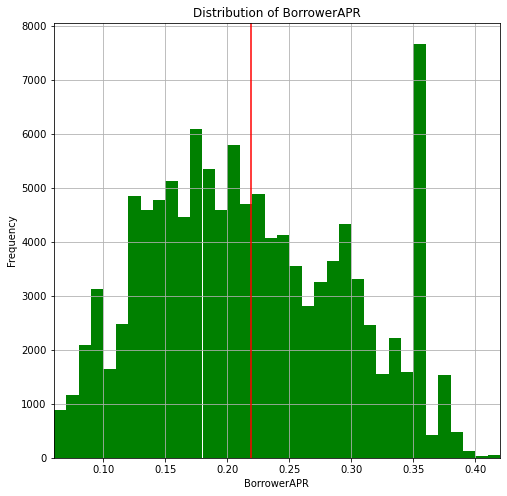

In [4]:
Binsize = np.arange(0, loan_df['BorrowerAPR'].max()+0.01, 0.01)
histogram('BorrowerAPR', Binsize)
plt.xlim(0.06, 0.42);

## Distribution of loan origination amount

> The distribution of loan origination amount is positively skewed and unimodal at about 3500 meaning that most of the borrowers took a loan that is below 10000 and most  collected a loan of about 3500. The average loan origination amount is about 8600. 

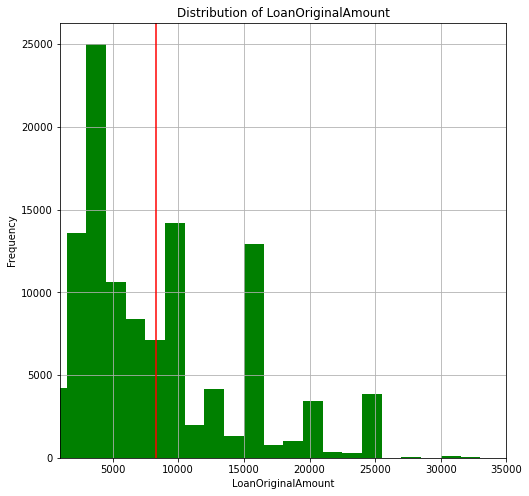

In [5]:
# Visualize the distribution of the Loan original amount
Binsize = np.arange(0,35000, 1500)
histogram('LoanOriginalAmount', Binsize)
plt.xlim(1000, 35000);

## Relationship between loan original amount and borrowers' APR
> There is a negative correlation between the borrowers' APR and origination amount. The higher the origination amount, the smaller the APR


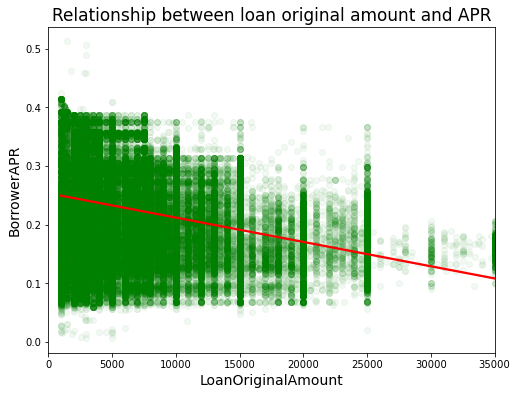

In [6]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', color = 'green',
            scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})
plt.xlim(0, 35000)
plt.title("Relationship between loan original amount and APR", fontsize = 17)
plt.xlabel("LoanOriginalAmount", fontsize = 14)
plt.ylabel("BorrowerAPR", fontsize = 14);

## Relationship between Monthly Income and Loan Origination Amount

> Monthly income influences the amount of loan taken by a borrower, the higher the income, the higher the loan amount.

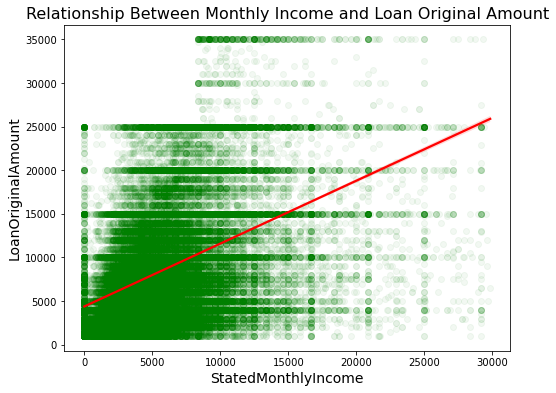

In [7]:
plt.figure(figsize = [8, 6])
df = loan_df.query('StatedMonthlyIncome < 30000')
sns.regplot(data = df, x = 'StatedMonthlyIncome', y='LoanOriginalAmount', color ='green',
            scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})
plt.xlabel("StatedMonthlyIncome", fontsize = 14)
plt.ylabel("LoanOriginalAmount", fontsize = 14)
plt.title("Relationship Between Monthly Income and Loan Original Amount", fontsize = 16);

## Influence of Loan Origination Amount on Loan Term

> The plot below shows that the higher the original amount of loan, the longer the term. Those who secure a loan that is more than 10000 are likely to pay back in 5 years whilw those below 5000 have a 1 year term.

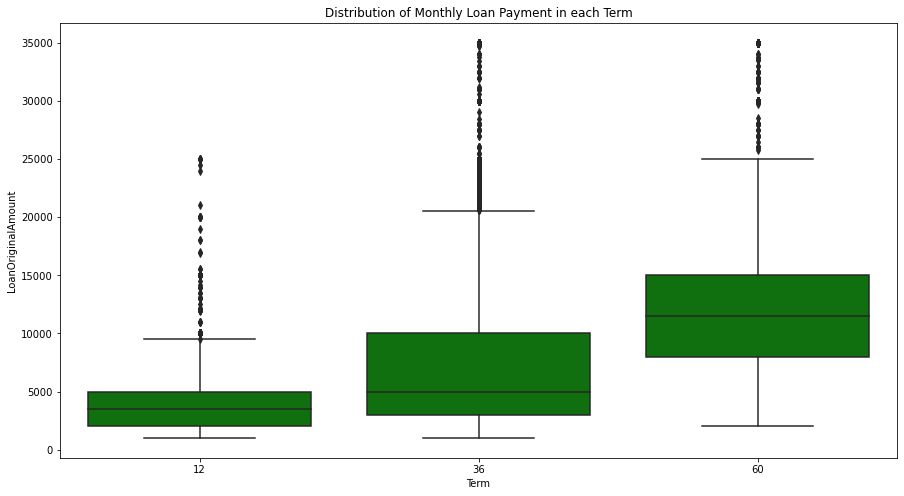

In [8]:
plt.figure(figsize=[15,8])
sns.boxplot(data=loan_df, x='Term', y='LoanOriginalAmount', color='green')
plt.title('Distribution of Monthly Loan Payment in each Term');